In [1]:
%%capture
!pip install cvlib

In [2]:
import cv2
import cvlib as cv
import sys
import numpy as np
from numpy.lib.type_check import imag
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
def detect_gender(file_name):
  image = cv2.imread(file_name)
  face, confidence = cv.detect_face(image)
  padding = 20

  for i in face:
      (x, y) = max(0, i[0]-padding), max(0, i[1]-padding)
      (x2, y2) = min(image.shape[1]-1, i[2]+padding), min(image.shape[0]-1,i[3]+padding)
      cv2.rectangle(image, (x, y), (x2, y2), (0, 255, 0), 2)
      crop = np.copy(image[y:y2, x:x2])
      (label, confidence) = cv.detect_gender(crop)
      idx = np.argmax(confidence)
      label = label[idx]
      label = "{}: {:.2f}%".format(label, confidence[idx] * 100)
      Y = y - 10 if y -10 > 10 else y + 10
      cv2.putText(image, label, (y, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

  image1 = cv2.imread(file_name)
  final_img = cv2.hconcat([image1,image])
  cv2_imshow(final_img)

[INFO] Initializing gender detection model ..


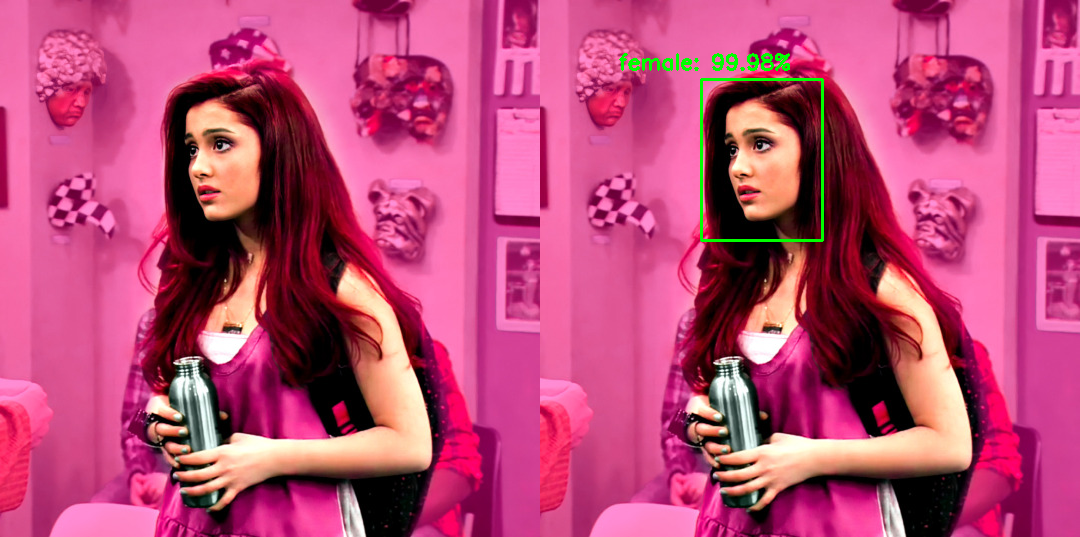

In [4]:
detect_gender("samp1.jpg")

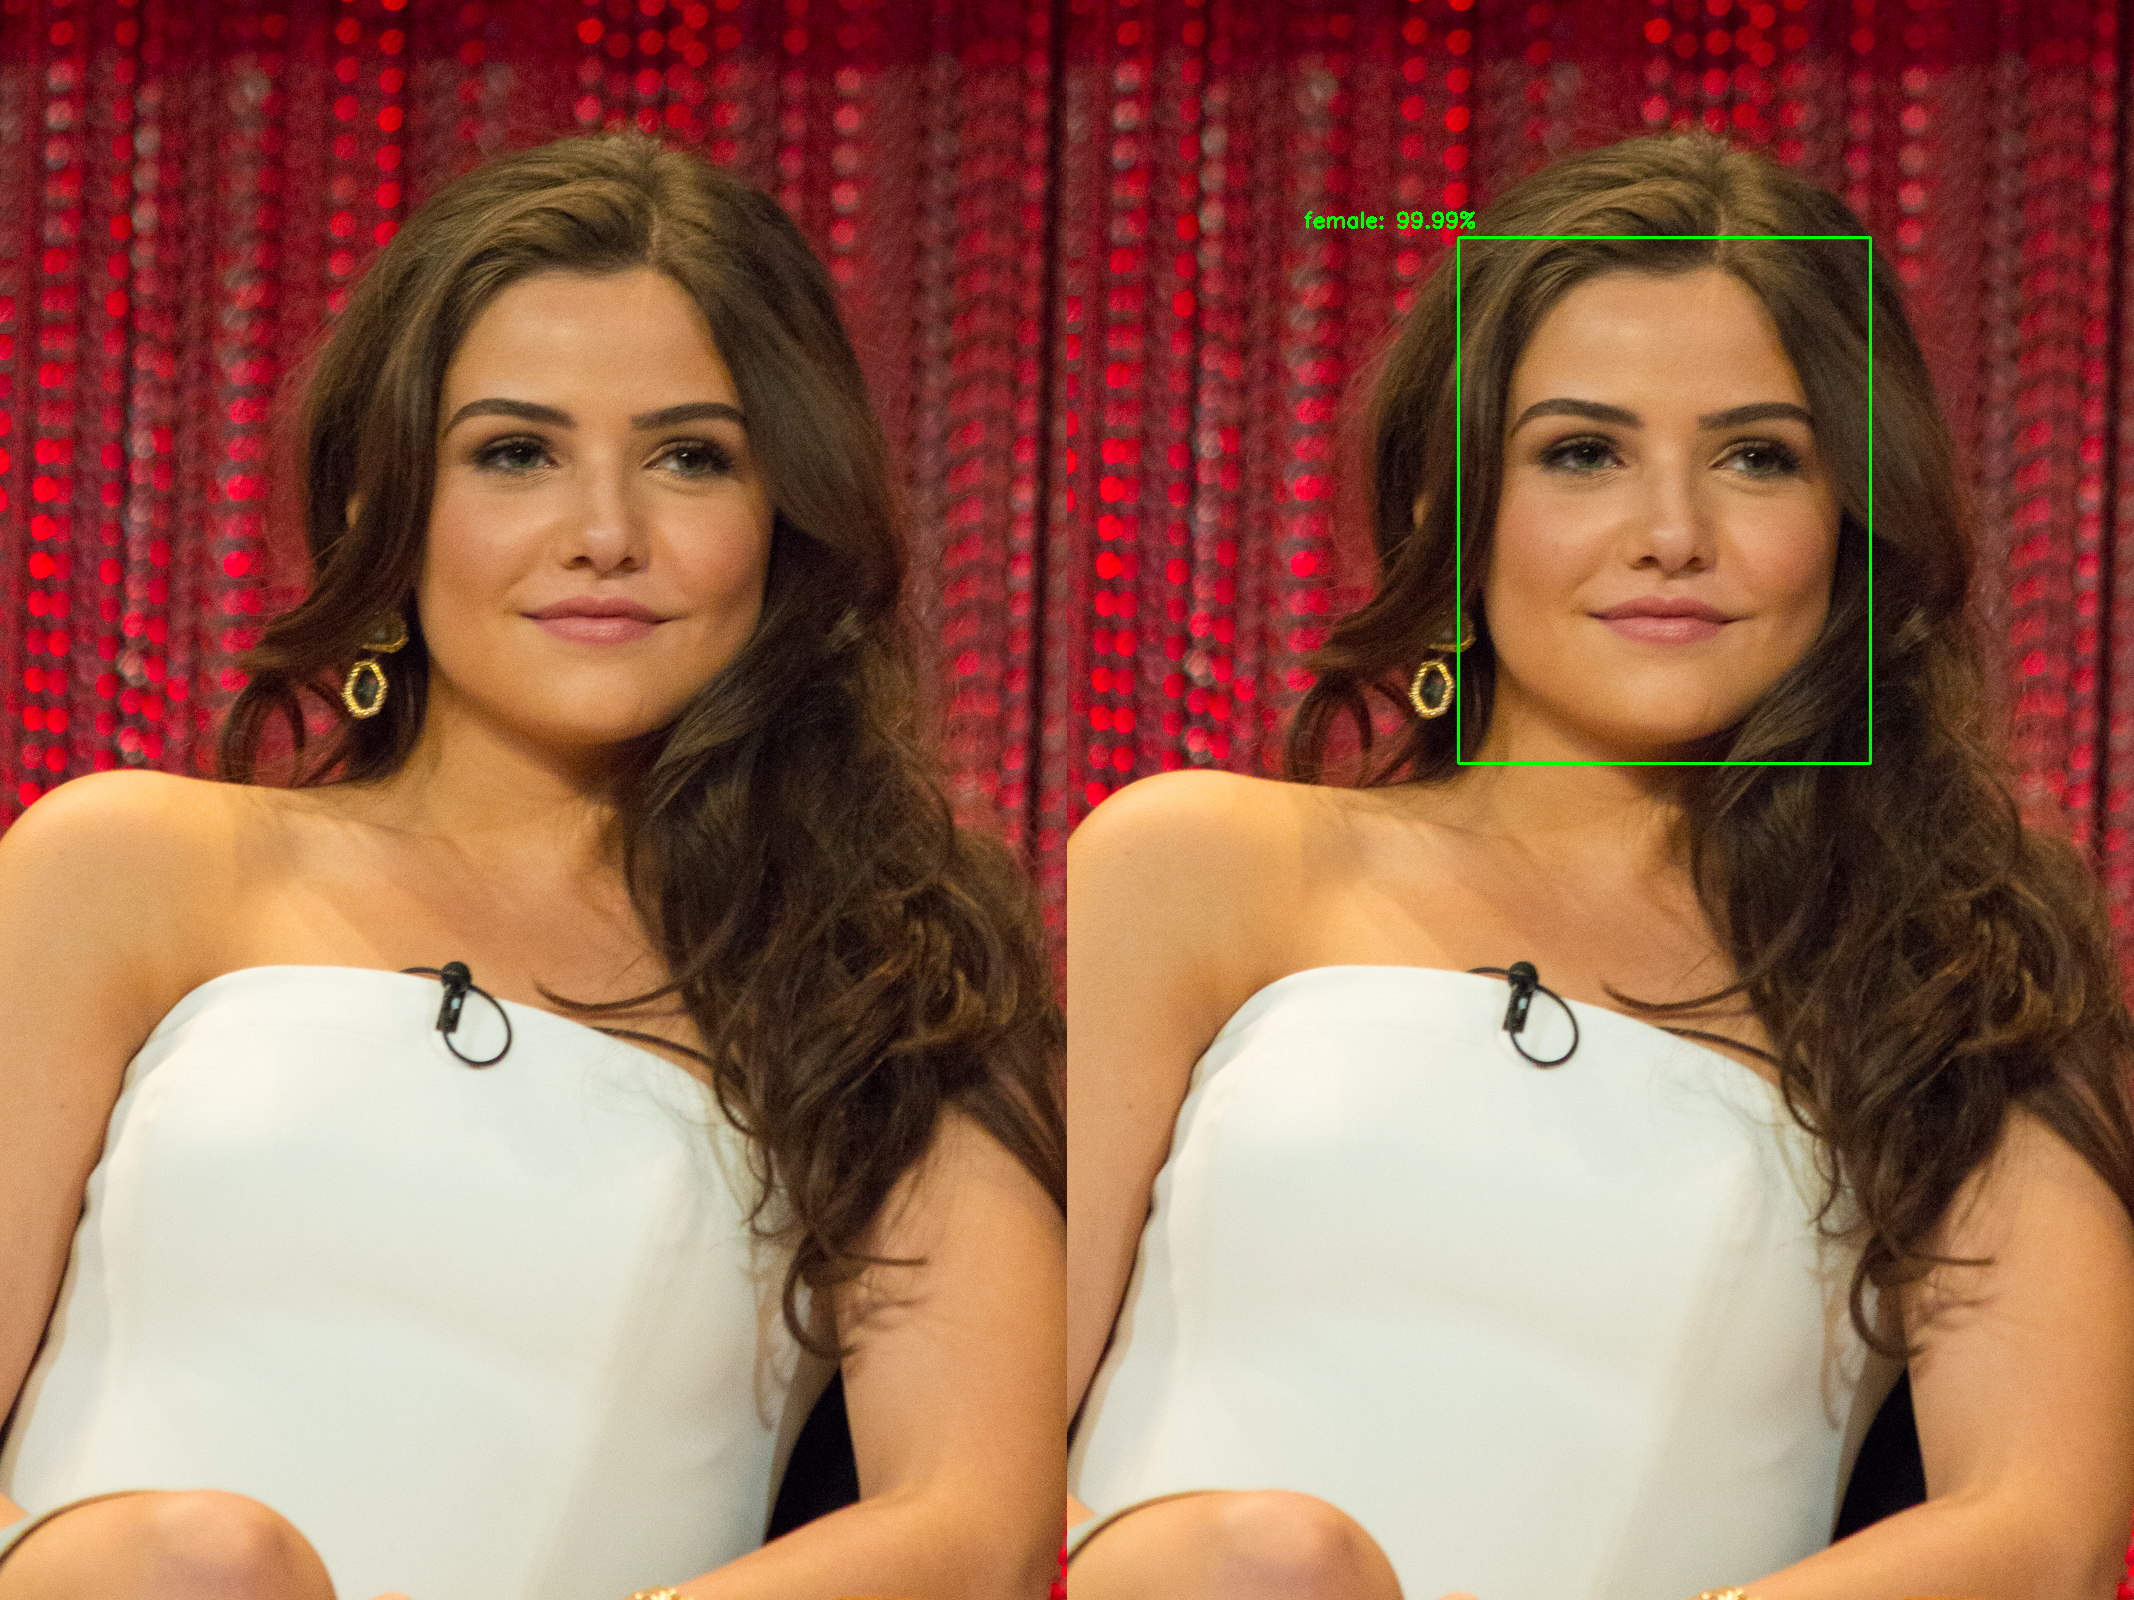

In [5]:
detect_gender("samp2.jpg")

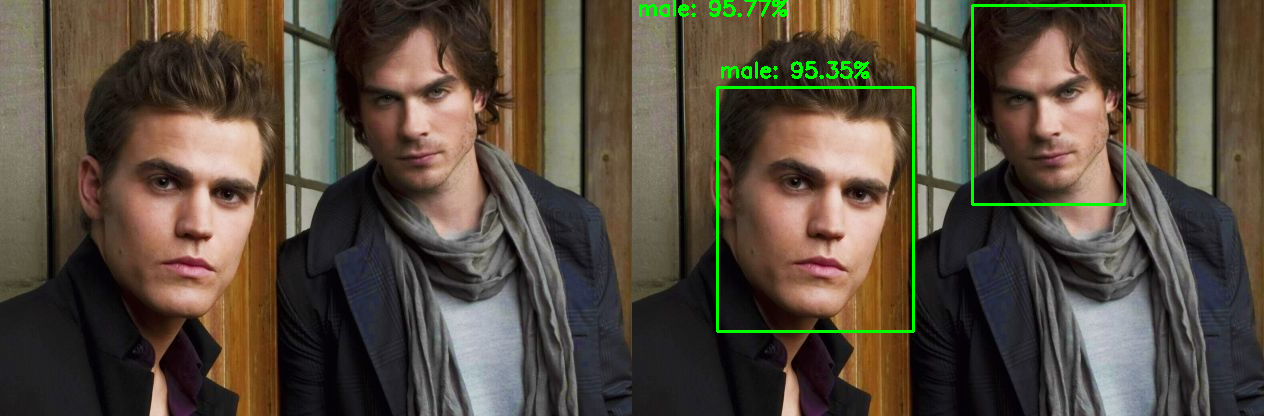

In [6]:
detect_gender("samp3.jpg")